## Estimation of city coordinates based on distance from each other



In [1]:
import random
import numpy as np
from matplotlib import pyplot as plt

Optimization function estimates the city coordinates by minimizing the difference between estimated city coordinates and actual distance between them
Funcation to implement the derivative of optimization function

In [2]:
def calculate_loss(city_X, city_distances):
    # Implementation of derivative function
    loss = []
    for i in range(9):
        l = np.array([[0],[0]])
        for j in range(9):
            if i == j:
                continue
            l2_dist = np.linalg.norm(city_X[i]-city_X[j])
            scale_dist = (l2_dist - city_distances[i][j])/l2_dist
            diff = city_X[i]-city_X[j]
            prod = diff * scale_dist
            l = l + prod
        loss.append(2*l)
    return np.array(loss)

Estimate City Coordinates. Function to initialize random city coordinates and then optimize for 5000 epochs

In [3]:
def calculate_lat_lon():
    
    # Distance of each city from each other are stored in city_distances

    city_distances = []

    city_distances.append([0, 206, 429, 1504, 963, 2976, 3095, 2979, 1949])
    city_distances.append([206, 0, 233, 1308, 802, 2815, 2934, 2786, 1771])
    city_distances.append([429, 233, 0, 1075, 671, 2684, 2799, 2631, 1616])
    city_distances.append([1504, 1308, 1075, 0, 1329, 3273, 3053, 2687, 2037])
    city_distances.append([963, 802, 671, 1329, 0, 2013, 2142, 2054, 996])
    city_distances.append([2976, 2815, 2684, 3273, 2013, 0, 808, 1131, 1307])
    city_distances.append([3095, 2934, 2799, 3053, 2142, 808, 0, 379, 1235])
    city_distances.append([2979, 2786, 2631, 2687, 2054, 1131, 379, 0, 1059])
    city_distances.append([1949, 1771, 1616, 2037, 996, 1307, 1235, 1059, 0])
    
    city_distances = np.array(city_distances)
    
    #Initialize random coords for the 9 cities
    city_X = []
    for _ in range(9):
        city_X.append([[random.random()],[random.random()]])
    city_X = np.array(city_X)
    
    #Call the optimization function defined above to find the city coordinates
    lr = 0.01
    # Epochs = 5000
    for _ in range(5000):
        loss = calculate_loss(city_X, city_distances)
        city_X = city_X-lr*loss

    return city_X


In [ ]:
Plot estimated city coordinates

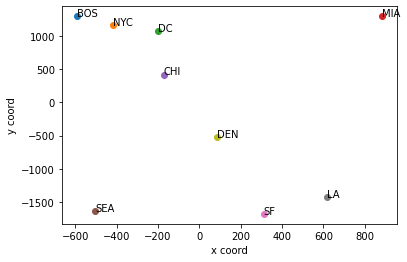

In [14]:
city_coords = calculate_lat_lon()
fig, ax = plt.subplots()

cities = ['BOS', 'NYC', 'DC', 'MIA', 'CHI', 'SEA', 'SF', 'LA', 'DEN']
for i in range(9):
    ax.scatter(city_coords[i][0], city_coords[i][1])
    ax.annotate(cities[i], (city_coords[i][0], city_coords[i][1]))

plt.xlabel('x coord')
plt.ylabel('y coord')
plt.show()

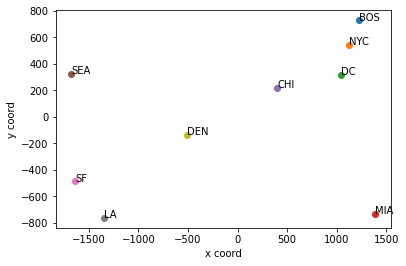

In [12]:
city_coords = calculate_lat_lon()
fig, ax = plt.subplots()

cities = ['BOS', 'NYC', 'DC', 'MIA', 'CHI', 'SEA', 'SF', 'LA', 'DEN']
for i in range(9):
    ax.scatter(city_coords[i][0], city_coords[i][1])
    ax.annotate(cities[i], (city_coords[i][0], city_coords[i][1]))

plt.xlabel('x coord')
plt.ylabel('y coord')
plt.show()

The estimated locations roughly match the actual geographical locations of these cities. However, the plot that is generated varies on each iteration. It is seen that the plots generated are rotated or mirrored or both when compared to the actual geographic location.